## Projekt dotyczący klasteryzacji przeprowadzony na danych z aplikacji randkowej

Projekt oparty jest na danych dostępnych na stronie <a href="https://www.kaggle.com">Kaggle</a>. Na podstawie tych danych została przeprowadzona klasteryzacja użytkowników korzystających z aplikacji randkowej. Moim celem było znalezienie odpoweidniej ilości klastrów i przypisanie do tych klastrów odpowednich użytkowników oraz zredukowanie wymiarów aby można było łatwiej zinterpretować wyniki.

Pierwszym krokiem jest zaimportowanie potrzebnych bibliotek na potrzeby tego projektu.

In [1]:
import pandas as pd
pd.options.display.max_rows = 1000
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

Kolejnym krokiem jest zaimportowanie danych.

In [2]:
data = pd.read_csv("./Speed Dating Data.csv", engine="python")

In [3]:
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


Przygotowanie i analiza danych.

Text(0, 0.5, 'Frequency')

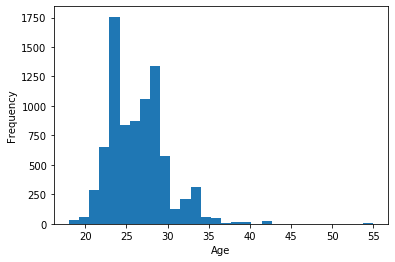

In [4]:
age = data[np.isfinite(data['age'])]['age']
plt.hist(age.values, bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')


In [5]:
pd.crosstab(index=data['match'],columns="count")

col_0,count
match,
0,6998
1,1380


In [6]:
print('second date rate = ',1380/6998)

second date rate =  0.19719919977136324


In [7]:
data_subset = data.loc[:, ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].copy()


In [8]:
data_subset.shape

(8378, 6)

In [9]:
data_subset.head(30)
data_subset.reset_index(drop=True, inplace=True)

In [10]:
data_subset.drop_duplicates(inplace=True)
data_subset.head()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,15.0,20.0,20.0,15.0,15.0,15.0
10,45.0,5.0,25.0,20.0,0.0,5.0
20,35.0,10.0,35.0,10.0,10.0,0.0
30,20.0,20.0,20.0,20.0,10.0,10.0
40,20.0,5.0,25.0,25.0,10.0,15.0


In [11]:
data_subset.shape

(473, 6)

Utworzenie obiektu kmeans.

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [13]:
scaler = StandardScaler()
data_subset.dropna(inplace=True)
data_subset_scaled = scaler.fit_transform(data_subset)
data_subset_scaled.mean(axis=0)

array([ 7.57508247e-18,  3.14365923e-16, -1.58129847e-16,  7.12057752e-16,
        0.00000000e+00,  1.06051155e-16])

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=15, tol=1e-04, random_state=0)
labels = kmeans.fit_predict(data_subset_scaled)
labels
kmeans.inertia_
labels

array([0, 2, 3, 0, 3, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 4, 3, 0, 4, 4, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 2, 1, 3, 4, 2, 2, 1, 1, 0, 3, 1,
       2, 2, 1, 3, 3, 2, 4, 2, 1, 0, 0, 0, 0, 2, 3, 1, 0, 0, 2, 0, 4, 0,
       4, 0, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 3, 0, 0, 0, 2,
       2, 1, 1, 4, 2, 4, 0, 2, 3, 1, 3, 3, 1, 0, 0, 3, 0, 0, 4, 2, 2, 2,
       4, 4, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1,
       4, 1, 2, 3, 2, 1, 0, 1, 0, 0, 1, 2, 1, 3, 1, 0, 0, 1, 0, 3, 3, 2,
       1, 0, 3, 0, 3, 2, 1, 3, 3, 4, 2, 3, 3, 1, 0, 4, 0, 1, 2, 1, 3, 0,
       0, 0, 3, 0, 3, 1, 1, 1, 0, 4, 1, 0, 1, 0, 0, 0, 4, 3, 0, 3, 3, 2,
       4, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0,

Przy pomocy elbow method dobieram optymalną ilość klastrów.

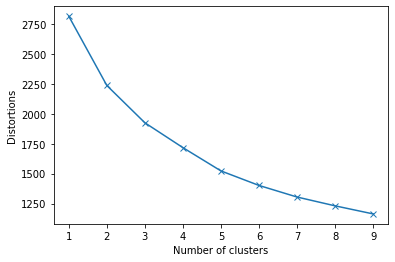

In [15]:
distortions =[]
for i in range (1,10):
    km = KMeans(n_clusters=i,
                init='k-means++',
                max_iter=500,
                n_init=15,
                tol=1e-04,
                random_state=0)
    km.fit(data_subset_scaled)  
    distortions.append(km.inertia_)
plt.plot(range(1,10), distortions, marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()


Utworzenie obiektu PCA.

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_subset_pca = pca.fit_transform(data_subset_scaled)
data_subset_pca[:15]

array([[-1.06778214,  0.10340993],
       [ 2.8233389 ,  0.45321497],
       [ 1.38163096,  2.16620868],
       [-0.07864422, -0.26900907],
       [ 0.23610737, -0.78806782],
       [-0.76925626, -0.76851082],
       [-0.55694816, -0.17346529],
       [-1.24104541,  0.13002657],
       [ 0.50449704, -1.66982346],
       [ 0.56990148, -3.21361936],
       [ 1.71300503,  0.22750862],
       [ 4.9652194 , -3.85462387],
       [-0.44162074, -0.28630824],
       [ 2.15853928, -3.08345679],
       [ 0.13124385,  0.81288793]])

In [17]:
data_subset_tf = pd.concat([pd.DataFrame(data_subset_pca, columns=['PC1', 'PC2']), 
                           pd.DataFrame(labels, columns=['labels'])], axis=1)
data_subset_tf[:15]

,PC1,PC2,labels
0,-1.067782,0.103410,0
1,2.823339,0.453215,2
2,1.381631,2.166209,3
3,-0.078644,-0.269009,0
4,0.236107,-0.788068,3
5,-0.769256,-0.768511,1
6,-0.556948,-0.173465,0
7,-1.241045,0.130027,0
8,0.504497,-1.669823,2
9,0.569901,-3.213619,2


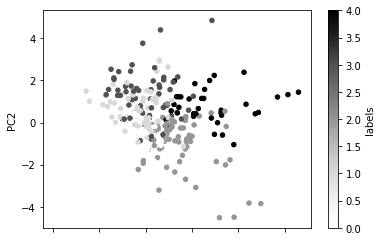

In [18]:
data_subset_tf.plot.scatter(x='PC1', y='PC2', c='labels')

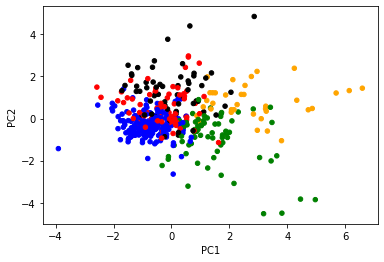

In [19]:
data_subset_tf.plot.scatter(x='PC1', y='PC2', c=data_subset_tf.labels.replace([0,1,2,3,4], ['blue', 'red', 'green', 'black','orange']))

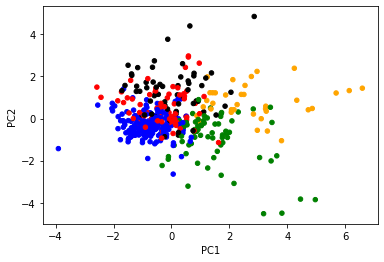

In [20]:
plot = data_subset_tf.plot.scatter(x='PC1', y='PC2', c=data_subset_tf.labels.replace([0,1,2,3,4], ['blue', 'red', 'green', 'black','orange']))
fig = plot.get_figure()
fig.savefig("our_first_results.png", dpi=600)

In [21]:
import numpy as np
np.matmul(pca.components_, np.array([100, 0, 0, 0, 0, 0]))

np.matmul(pca.components_, np.array([10, 10, 0, 70, 10, 0]))

array([  3.1879058 , -54.74992101])

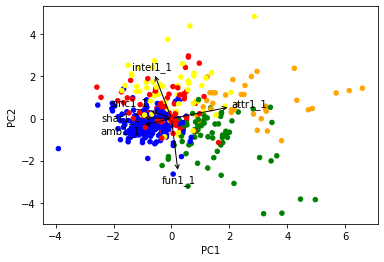

In [22]:
import matplotlib.pyplot as plt

data_subset_tf.plot.scatter(x='PC1', y='PC2', c=data_subset_tf.labels.replace([0,1,2,3,4], ['blue', 'red', 'green', 'yellow','orange']))#plt.arrow(0, 0, pca.components_[0,0]*6, pca.components_[0,1]*6, shape='left')
for i, colname in enumerate(data_subset.columns):
    plt.annotate(colname, ha='center', va='bottom', xy=(0, 0), size=10,
             xytext=(pca.components_[0,i]*4, pca.components_[1,i]*4), 
             arrowprops = {'arrowstyle':'<-'})

Utworzenie obiektu T-SNE aby zredukować wymiary.

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [24]:
print(data_subset_scaled.shape)

(469, 6)


In [25]:
data_subset_tsne = TSNE(learning_rate=10, perplexity=30).fit_transform(data_subset_scaled)

In [26]:
data_subset_tsne[:15]

array([[  4.8834877, -13.072224 ],
       [-11.119435 ,  15.885817 ],
       [-11.26342  ,  12.692571 ],
       [  1.1097797,   4.372608 ],
       [-10.193946 ,   4.8490725],
       [ -1.7905828,   6.890782 ],
       [ 15.219439 ,  -3.075362 ],
       [ 16.341125 ,  -3.5859308],
       [ -8.346154 ,   7.2451186],
       [ -1.6764755,  21.329384 ],
       [ -3.6704402,  15.577796 ],
       [ -5.113736 ,  22.93621  ],
       [  7.6771617,  -8.66334  ],
       [ -2.7819386,  21.463116 ],
       [-19.424349 ,  13.786377 ]], dtype=float32)

In [27]:
data_subset_tsnee = pd.concat([pd.DataFrame(data_subset_tsne, columns=['X', 'Y']), 
                           pd.DataFrame(labels, columns=['labels'])], axis=1)
data_subset_tsnee[:15]

,X,Y,labels
0,4.883488,-13.072224,0
1,-11.119435,15.885817,2
2,-11.263420,12.692571,3
3,1.109780,4.372608,0
4,-10.193946,4.849072,3
5,-1.790583,6.890782,1
6,15.219439,-3.075362,0
7,16.341125,-3.585931,0
8,-8.346154,7.245119,2
9,-1.676476,21.329384,2


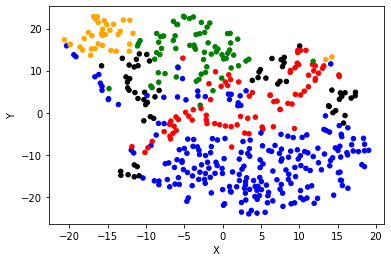

In [28]:
data_subset_tsnee.plot.scatter(x='X', y='Y', c=data_subset_tf.labels.replace([0,1,2,3,4], ['blue', 'red', 'green', 'black','orange']))